# Cardio Good Fitness

### CONTEXT

Scenario: 
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill 
product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store in the last three months. The data are stored in the CardioGoodFitness.csv file.
The team identifies the following customer variables to study:

● product purchased, TM195, TM498, or TM798

● gender

● age, in years

● education, in years

● relationship status, single or partnered

● annual household income (dollars)

● average number of times the customer plans to use the treadmill each week

● average number of miles the customer expects to walk/run each week

● self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### PROBLEM STATEMENT

Look for a correlation in the data that can be used for a future promotion

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT DATA

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

INSPECT DATA

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The data appears to be complete with no obvious cleaning required at this stage.

We can look at the correlation for all the data and create a heat map.

We will change Gender and Marital Status for numerical data.

In [5]:
gender_map = {'Male': 1, 'Female': 0}
marital_status_map = {'Single': 1, 'Partnered': 2}
df['Gender'] = df['Gender'].replace(gender_map)
df['MaritalStatus'] = df['MaritalStatus'].replace(marital_status_map) 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,1,14,1,3,4,29562,112
1,TM195,19,1,15,1,2,3,31836,75
2,TM195,19,0,14,2,4,3,30699,66
3,TM195,19,1,12,1,3,3,32973,85
4,TM195,20,1,13,2,4,2,35247,47


In [6]:
df.corr()

C:\Users\geoff\AppData\Local\Temp\ipykernel_26724\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Age,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


C:\Users\geoff\AppData\Local\Temp\ipykernel_26724\1308868159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


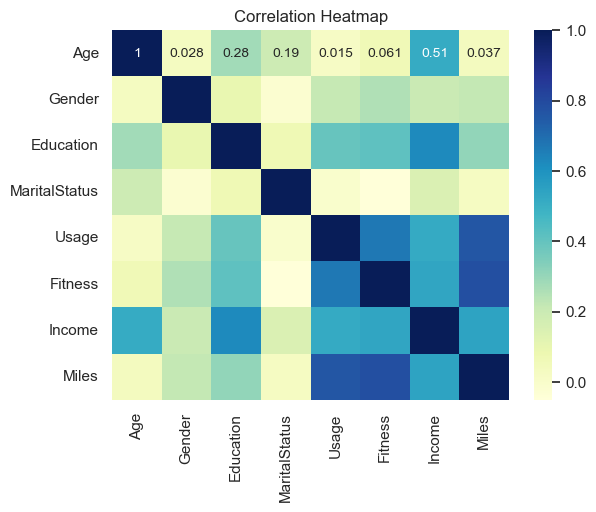

In [7]:
correlation_matrix = df.corr()
sns.set(font_scale=1.0)
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, annot_kws={'size': 10} )
plt.title("Correlation Heatmap")
plt.show()

There is a significant correlation between Fitness, Usage and Miles.

Fitness and Miles is 0.79

Usage and Miles is 0.76

Fitness and Usage is 0.69

### QUESTION

How do these statements impact on the choice of treadmill?

### VISUALISATIONS

We need to compare the data seperately for each treadmill

We should examine Usage, Fitness, Income and Miles for each treadmill.

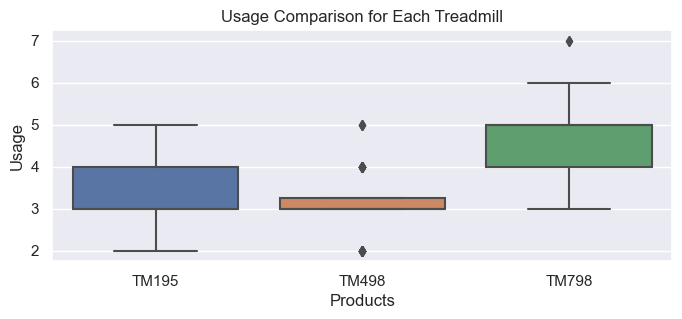

In [9]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Product', y='Usage', data=df)
plt.xlabel('Products')
plt.ylabel('Usage')
plt.title('Usage Comparison for Each Treadmill')
plt.show()

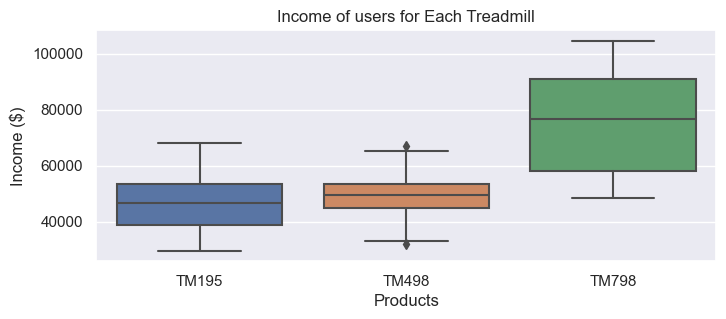

In [10]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Product', y='Income', data=df)
plt.xlabel('Products')
plt.ylabel('Income ($)')
plt.title('Income of Users for Each Treadmill')
plt.show()

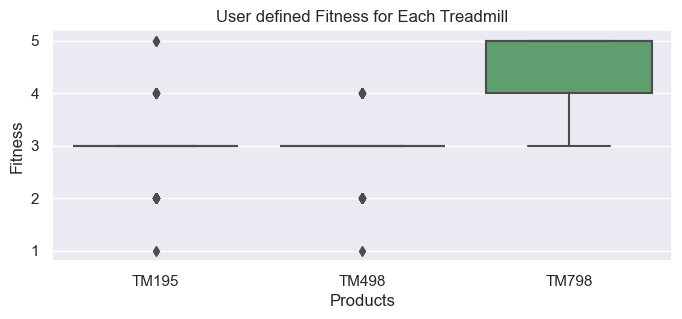

In [11]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Product', y='Fitness', data=df)
plt.xlabel('Products')
plt.ylabel('Fitness')
plt.title('User defined Fitness for each Treadmill')
plt.show()

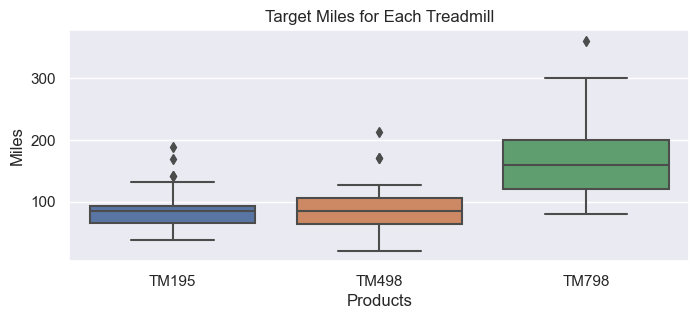

In [12]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Product', y='Miles', data=df)
plt.xlabel('Products')
plt.ylabel('Miles')
plt.title('Target Miles for Each Treadmill')
plt.show()

### OBSERVATIONS

TM798 is used more than the other two treadmills.

Users of TM798 tend to have higher incomes than the users of the other two treadmills.

The majority of the users of TM798 consider themselves to be fit.

Users of TM798 run significantly more miles than the users of the other treadmills.

### Conclusions

Product TM798 should be marketed at ultra athletes as a professional choice of treadmill.